In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
df = pd.read_csv('data/diagnosis.csv')
df.columns

Index(['ID number', 'Diagnosis', 'Radius mean', 'Texture mean',
       'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean',
       'Concavity mean', 'Concave Points mean', 'Symmetry mean',
       'Fractal Dimension mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
       'Radius worst', 'Texture worst', 'Perimeter worst', 'Area worst',
       'Smoothness worst', 'Compactness worst', 'Concavity worst',
       'Concave Points worst', 'Symmetry worst', 'Fractal Dimension worst'],
      dtype='object')

### Setup

In [2]:
# Read in the data and set up the input and output
diagnosis_df = pd.read_csv('data/diagnosis.csv')

X = diagnosis_df.drop(['ID number', 'Diagnosis'], axis=1)
y = diagnosis_df['Diagnosis'].map({'M': 1, 'B': 0})

In [3]:
# Split test, train, and demo
from sklearn.model_selection import train_test_split

X_use, X_demo, y_use, y_demo = train_test_split(X, y, random_state=2, test_size=0.02)
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, random_state=3)

In [6]:
# Scale X
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_demo_scaled = X_scaler.transform(X_demo)

### SVM

In [7]:
# Create model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

In [8]:
# Initialize GridSearch
from sklearn.model_selection import GridSearchCV

# Set up C and gamma values
c_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-10, 10, 20)
param_grid = {'C': c_range, 'gamma': gamma_range}
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [9]:
# Fit model
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV] C=0.001, gamma=1e-10 ............................................
[CV] ... C=0.001, gamma=1e-10, score=0.9280575539568345, total=   0.0s
[CV] C=0.001, gamma=1e-10 ............................................
[CV] ... C=0.001, gamma=1e-10, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=1e-10 ............................................
[CV] ... C=0.001, gamma=1e-10, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=1.12883789168e-09 ................................
[CV]  C=0.001, gamma=1.12883789168e-09, score=0.9280575539568345, total=   0.0s
[CV] C=0.001, gamma=1.12883789168e-09 ................................
[CV]  C=0.001, gamma=1.12883789168e-09, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=1.12883789168e-09 ................................
[CV]  C=0.001, gamma=1.12883789168e-09, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=1.2742749857e-08 .....................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, gamma=0.00233572146909, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=0.0263665089873 ..................................
[CV]  C=0.001, gamma=0.0263665089873, score=0.9280575539568345, total=   0.0s
[CV] C=0.001, gamma=0.0263665089873 ..................................
[CV]  C=0.001, gamma=0.0263665089873, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=0.0263665089873 ..................................
[CV]  C=0.001, gamma=0.0263665089873, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=0.297635144163 ...................................
[CV]  C=0.001, gamma=0.297635144163, score=0.9280575539568345, total=   0.0s
[CV] C=0.001, gamma=0.297635144163 ...................................
[CV]  C=0.001, gamma=0.297635144163, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=0.297635144163 ...................................
[CV]  C=0.001, gamma=0.297635144163, score=0.9064748201438849, total=   0.0s
[CV] C=0.001, gamma=3.35981828

[CV]  C=0.01, gamma=615848.211066, score=0.9640287769784173, total=   0.0s
[CV] C=0.01, gamma=615848.211066 .....................................
[CV]  C=0.01, gamma=615848.211066, score=0.9856115107913669, total=   0.0s
[CV] C=0.01, gamma=615848.211066 .....................................
[CV]  C=0.01, gamma=615848.211066, score=0.9496402877697842, total=   0.0s
[CV] C=0.01, gamma=6951927.96178 .....................................
[CV]  C=0.01, gamma=6951927.96178, score=0.9640287769784173, total=   0.0s
[CV] C=0.01, gamma=6951927.96178 .....................................
[CV]  C=0.01, gamma=6951927.96178, score=0.9856115107913669, total=   0.0s
[CV] C=0.01, gamma=6951927.96178 .....................................
[CV]  C=0.01, gamma=6951927.96178, score=0.9496402877697842, total=   0.0s
[CV] C=0.01, gamma=78475997.0351 .....................................
[CV]  C=0.01, gamma=78475997.0351, score=0.9640287769784173, total=   0.0s
[CV] C=0.01, gamma=78475997.0351 ................

[CV]  C=1.0, gamma=1.2742749857e-08, score=0.9712230215827338, total=   0.0s
[CV] C=1.0, gamma=1.2742749857e-08 ...................................
[CV]  C=1.0, gamma=1.2742749857e-08, score=0.9496402877697842, total=   0.0s
[CV] C=1.0, gamma=1.2742749857e-08 ...................................
[CV]  C=1.0, gamma=1.2742749857e-08, score=0.9640287769784173, total=   0.0s
[CV] C=1.0, gamma=1.43844988829e-07 ..................................
[CV]  C=1.0, gamma=1.43844988829e-07, score=0.9712230215827338, total=   0.0s
[CV] C=1.0, gamma=1.43844988829e-07 ..................................
[CV]  C=1.0, gamma=1.43844988829e-07, score=0.9496402877697842, total=   0.0s
[CV] C=1.0, gamma=1.43844988829e-07 ..................................
[CV]  C=1.0, gamma=1.43844988829e-07, score=0.9640287769784173, total=   0.0s
[CV] C=1.0, gamma=1.62377673919e-06 ..................................
[CV]  C=1.0, gamma=1.62377673919e-06, score=0.9712230215827338, total=   0.0s
[CV] C=1.0, gamma=1.62377673919

[CV]  C=10.0, gamma=37.9269019073, score=0.9568345323741008, total=   0.0s
[CV] C=10.0, gamma=37.9269019073 .....................................
[CV]  C=10.0, gamma=37.9269019073, score=0.9064748201438849, total=   0.0s
[CV] C=10.0, gamma=37.9269019073 .....................................
[CV]  C=10.0, gamma=37.9269019073, score=0.9640287769784173, total=   0.0s
[CV] C=10.0, gamma=428.133239872 .....................................
[CV]  C=10.0, gamma=428.133239872, score=0.9568345323741008, total=   0.0s
[CV] C=10.0, gamma=428.133239872 .....................................
[CV]  C=10.0, gamma=428.133239872, score=0.9064748201438849, total=   0.0s
[CV] C=10.0, gamma=428.133239872 .....................................
[CV]  C=10.0, gamma=428.133239872, score=0.9640287769784173, total=   0.0s
[CV] C=10.0, gamma=4832.93023857 .....................................
[CV]  C=10.0, gamma=4832.93023857, score=0.9568345323741008, total=   0.0s
[CV] C=10.0, gamma=4832.93023857 ................

[CV]  C=100.0, gamma=428.133239872, score=0.9424460431654677, total=   0.0s
[CV] C=100.0, gamma=4832.93023857 ....................................
[CV]  C=100.0, gamma=4832.93023857, score=0.9640287769784173, total=   0.0s
[CV] C=100.0, gamma=4832.93023857 ....................................
[CV]  C=100.0, gamma=4832.93023857, score=0.8705035971223022, total=   0.0s
[CV] C=100.0, gamma=4832.93023857 ....................................
[CV]  C=100.0, gamma=4832.93023857, score=0.9424460431654677, total=   0.0s
[CV] C=100.0, gamma=54555.9478117 ....................................
[CV]  C=100.0, gamma=54555.9478117, score=0.9640287769784173, total=   0.0s
[CV] C=100.0, gamma=54555.9478117 ....................................
[CV]  C=100.0, gamma=54555.9478117, score=0.8705035971223022, total=   0.0s
[CV] C=100.0, gamma=54555.9478117 ....................................
[CV]  C=100.0, gamma=54555.9478117, score=0.9424460431654677, total=   0.0s
[CV] C=100.0, gamma=615848.211066 ........

[CV]  C=1000.0, gamma=37.9269019073, score=0.9424460431654677, total=   0.0s
[CV] C=1000.0, gamma=428.133239872 ...................................
[CV]  C=1000.0, gamma=428.133239872, score=0.9640287769784173, total=   0.0s
[CV] C=1000.0, gamma=428.133239872 ...................................
[CV]  C=1000.0, gamma=428.133239872, score=0.8705035971223022, total=   0.0s
[CV] C=1000.0, gamma=428.133239872 ...................................
[CV]  C=1000.0, gamma=428.133239872, score=0.9424460431654677, total=   0.0s
[CV] C=1000.0, gamma=4832.93023857 ...................................
[CV]  C=1000.0, gamma=4832.93023857, score=0.9640287769784173, total=   0.0s
[CV] C=1000.0, gamma=4832.93023857 ...................................
[CV]  C=1000.0, gamma=4832.93023857, score=0.8705035971223022, total=   0.0s
[CV] C=1000.0, gamma=4832.93023857 ...................................
[CV]  C=1000.0, gamma=4832.93023857, score=0.9424460431654677, total=   0.0s
[CV] C=1000.0, gamma=54555.9478117 

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03]), 'gamma': array([  1.00000e-10,   1.12884e-09,   1.27427e-08,   1.43845e-07,
         1.62378e-06,   1.83298e-05,   2.06914e-04,   2.33572e-03,
         2.63665e-02,   2.97635e-01,   3.35982e+00,   3.79269e+01,
         4.28133e+02,   4.83293e+03,   5.45559e+04,   6.15848e+05,
         6.95193e+06,   7.84760e+07,   8.85867e+08,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [36]:
# Test with test data
predictions = grid.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["malignant", "benign"]))

             precision    recall  f1-score   support

  malignant       0.99      0.98      0.98        96
     benign       0.95      0.98      0.97        43

avg / total       0.98      0.98      0.98       139



In [37]:
# Test with demo data
# Test with test data
predictions = grid.predict(X_demo_scaled)

print(classification_report(y_demo, predictions,
                            target_names=["malignant", "benign"]))

             precision    recall  f1-score   support

  malignant       1.00      1.00      1.00         6
     benign       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        12



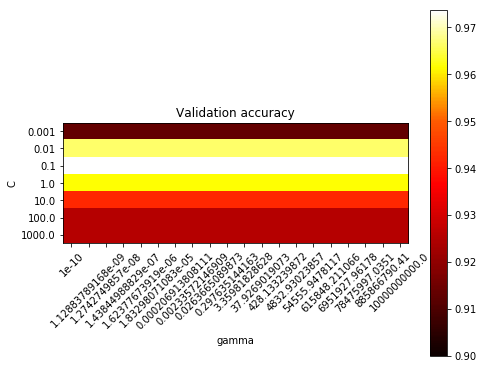

In [13]:
# Show heatmap
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = grid.cv_results_['mean_test_score'].reshape(len(c_range),
                                                     len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.9, midpoint=0.95))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(c_range)), c_range)
plt.title('Validation accuracy')
plt.show()

### TensorFlow

In [16]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_demo_categorical = to_categorical(y_demo)

In [18]:
X_train_scaled.shape

(417, 30)

In [19]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=30))
model.add(Dense(units=2, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 186       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 1.2128 - acc: 0.2350
Epoch 2/100
 - 0s - loss: 0.9459 - acc: 0.3309
Epoch 3/100
 - 0s - loss: 0.7414 - acc: 0.5132
Epoch 4/100
 - 0s - loss: 0.5989 - acc: 0.6978
Epoch 5/100
 - 0s - loss: 0.5031 - acc: 0.7866
Epoch 6/100
 - 0s - loss: 0.4361 - acc: 0.8297
Epoch 7/100
 - 0s - loss: 0.3849 - acc: 0.8609
Epoch 8/100
 - 0s - loss: 0.3444 - acc: 0.8921
Epoch 9/100
 - 0s - loss: 0.3101 - acc: 0.9041
Epoch 10/100
 - 0s - loss: 0.2817 - acc: 0.9161
Epoch 11/100
 - 0s - loss: 0.2582 - acc: 0.9209
Epoch 12/100
 - 0s - loss: 0.2397 - acc: 0.9257
Epoch 13/100
 - 0s - loss: 0.2234 - acc: 0.9329
Epoch 14/100
 - 0s - loss: 0.2086 - acc: 0.9424
Epoch 15/100
 - 0s - loss: 0.1966 - acc: 0.9472
Epoch 16/100
 - 0s - loss: 0.1862 - acc: 0.9496
Epoch 17/100
 - 0s - loss: 0.1776 - acc: 0.9496
Epoch 18/100
 - 0s - loss: 0.1694 - acc: 0.9496
Epoch 19/100
 - 0s - loss: 0.1616 - acc: 0.9544
Epoch 20/100
 - 0s - loss: 0.1542 - acc: 0.9544
Epoch 21/100
 - 0s - loss: 0.1469 - acc: 0.9568
E

In [23]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=30))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 186       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [24]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 0s - loss: 0.5944 - acc: 0.6739
Epoch 2/1000
 - 0s - loss: 0.5216 - acc: 0.8082
Epoch 3/1000
 - 0s - loss: 0.4644 - acc: 0.8681
Epoch 4/1000
 - 0s - loss: 0.4153 - acc: 0.8969
Epoch 5/1000
 - 0s - loss: 0.3740 - acc: 0.9137
Epoch 6/1000
 - 0s - loss: 0.3371 - acc: 0.9185
Epoch 7/1000
 - 0s - loss: 0.3056 - acc: 0.9209
Epoch 8/1000
 - 0s - loss: 0.2777 - acc: 0.9233
Epoch 9/1000
 - 0s - loss: 0.2538 - acc: 0.9329
Epoch 10/1000
 - 0s - loss: 0.2314 - acc: 0.9400
Epoch 11/1000
 - 0s - loss: 0.2119 - acc: 0.9448
Epoch 12/1000
 - 0s - loss: 0.1941 - acc: 0.9544
Epoch 13/1000
 - 0s - loss: 0.1775 - acc: 0.9568
Epoch 14/1000
 - 0s - loss: 0.1639 - acc: 0.9568
Epoch 15/1000
 - 0s - loss: 0.1522 - acc: 0.9568
Epoch 16/1000
 - 0s - loss: 0.1420 - acc: 0.9640
Epoch 17/1000
 - 0s - loss: 0.1328 - acc: 0.9712
Epoch 18/1000
 - 0s - loss: 0.1246 - acc: 0.9736
Epoch 19/1000
 - 0s - loss: 0.1176 - acc: 0.9784
Epoch 20/1000
 - 0s - loss: 0.1110 - acc: 0.9784
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.0293 - acc: 0.9928
Epoch 168/1000
 - 0s - loss: 0.0291 - acc: 0.9928
Epoch 169/1000
 - 0s - loss: 0.0290 - acc: 0.9928
Epoch 170/1000
 - 0s - loss: 0.0287 - acc: 0.9928
Epoch 171/1000
 - 0s - loss: 0.0292 - acc: 0.9904
Epoch 172/1000
 - 0s - loss: 0.0318 - acc: 0.9904
Epoch 173/1000
 - 0s - loss: 0.0312 - acc: 0.9880
Epoch 174/1000
 - 0s - loss: 0.0306 - acc: 0.9880
Epoch 175/1000
 - 0s - loss: 0.0299 - acc: 0.9904
Epoch 176/1000
 - 0s - loss: 0.0292 - acc: 0.9904
Epoch 177/1000
 - 0s - loss: 0.0287 - acc: 0.9904
Epoch 178/1000
 - 0s - loss: 0.0284 - acc: 0.9928
Epoch 179/1000
 - 0s - loss: 0.0281 - acc: 0.9928
Epoch 180/1000
 - 0s - loss: 0.0278 - acc: 0.9928
Epoch 181/1000
 - 0s - loss: 0.0276 - acc: 0.9928
Epoch 182/1000
 - 0s - loss: 0.0274 - acc: 0.9928
Epoch 183/1000
 - 0s - loss: 0.0270 - acc: 0.9928
Epoch 184/1000
 - 0s - loss: 0.0268 - acc: 0.9928
Epoch 185/1000
 - 0s - loss: 0.0266 - acc: 0.9928
Epoch 186/1000
 - 0s - loss: 0.0264 - acc: 0.9928
Epoch 187/1000


 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 332/1000
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 333/1000
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 334/1000
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 335/1000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 336/1000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 337/1000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 338/1000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 339/1000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 340/1000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 341/1000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 342/1000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 343/1000
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 344/1000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 345/1000
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 346/1000
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 347/1000
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 348/1000
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 349/1000
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 350/1000
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 351/1000


Epoch 492/1000
 - 0s - loss: 5.8177e-04 - acc: 1.0000
Epoch 493/1000
 - 0s - loss: 5.7142e-04 - acc: 1.0000
Epoch 494/1000
 - 0s - loss: 5.7183e-04 - acc: 1.0000
Epoch 495/1000
 - 0s - loss: 5.6022e-04 - acc: 1.0000
Epoch 496/1000
 - 0s - loss: 5.5848e-04 - acc: 1.0000
Epoch 497/1000
 - 0s - loss: 5.6012e-04 - acc: 1.0000
Epoch 498/1000
 - 0s - loss: 5.4940e-04 - acc: 1.0000
Epoch 499/1000
 - 0s - loss: 5.4279e-04 - acc: 1.0000
Epoch 500/1000
 - 0s - loss: 5.3597e-04 - acc: 1.0000
Epoch 501/1000
 - 0s - loss: 5.3358e-04 - acc: 1.0000
Epoch 502/1000
 - 0s - loss: 5.2116e-04 - acc: 1.0000
Epoch 503/1000
 - 0s - loss: 5.1203e-04 - acc: 1.0000
Epoch 504/1000
 - 0s - loss: 5.0776e-04 - acc: 1.0000
Epoch 505/1000
 - 0s - loss: 5.0968e-04 - acc: 1.0000
Epoch 506/1000
 - 0s - loss: 4.9134e-04 - acc: 1.0000
Epoch 507/1000
 - 0s - loss: 4.9385e-04 - acc: 1.0000
Epoch 508/1000
 - 0s - loss: 4.9110e-04 - acc: 1.0000
Epoch 509/1000
 - 0s - loss: 4.7482e-04 - acc: 1.0000
Epoch 510/1000
 - 0s - loss:

Epoch 644/1000
 - 0s - loss: 1.2640e-04 - acc: 1.0000
Epoch 645/1000
 - 0s - loss: 1.2581e-04 - acc: 1.0000
Epoch 646/1000
 - 0s - loss: 1.2432e-04 - acc: 1.0000
Epoch 647/1000
 - 0s - loss: 1.2309e-04 - acc: 1.0000
Epoch 648/1000
 - 0s - loss: 1.2295e-04 - acc: 1.0000
Epoch 649/1000
 - 0s - loss: 1.2312e-04 - acc: 1.0000
Epoch 650/1000
 - 0s - loss: 1.2159e-04 - acc: 1.0000
Epoch 651/1000
 - 0s - loss: 1.2072e-04 - acc: 1.0000
Epoch 652/1000
 - 0s - loss: 1.1858e-04 - acc: 1.0000
Epoch 653/1000
 - 0s - loss: 1.1672e-04 - acc: 1.0000
Epoch 654/1000
 - 0s - loss: 1.1702e-04 - acc: 1.0000
Epoch 655/1000
 - 0s - loss: 1.1529e-04 - acc: 1.0000
Epoch 656/1000
 - 0s - loss: 1.2638e-04 - acc: 1.0000
Epoch 657/1000
 - 0s - loss: 1.2650e-04 - acc: 1.0000
Epoch 658/1000
 - 0s - loss: 1.1586e-04 - acc: 1.0000
Epoch 659/1000
 - 0s - loss: 1.1567e-04 - acc: 1.0000
Epoch 660/1000
 - 0s - loss: 1.1748e-04 - acc: 1.0000
Epoch 661/1000
 - 0s - loss: 1.1435e-04 - acc: 1.0000
Epoch 662/1000
 - 0s - loss:

Epoch 796/1000
 - 0s - loss: 3.5875e-05 - acc: 1.0000
Epoch 797/1000
 - 0s - loss: 3.5350e-05 - acc: 1.0000
Epoch 798/1000
 - 0s - loss: 3.4855e-05 - acc: 1.0000
Epoch 799/1000
 - 0s - loss: 3.4813e-05 - acc: 1.0000
Epoch 800/1000
 - 0s - loss: 3.4852e-05 - acc: 1.0000
Epoch 801/1000
 - 0s - loss: 3.4095e-05 - acc: 1.0000
Epoch 802/1000
 - 0s - loss: 3.4037e-05 - acc: 1.0000
Epoch 803/1000
 - 0s - loss: 3.4448e-05 - acc: 1.0000
Epoch 804/1000
 - 0s - loss: 3.3387e-05 - acc: 1.0000
Epoch 805/1000
 - 0s - loss: 3.3830e-05 - acc: 1.0000
Epoch 806/1000
 - 0s - loss: 3.3427e-05 - acc: 1.0000
Epoch 807/1000
 - 0s - loss: 3.3267e-05 - acc: 1.0000
Epoch 808/1000
 - 0s - loss: 3.2747e-05 - acc: 1.0000
Epoch 809/1000
 - 0s - loss: 3.2348e-05 - acc: 1.0000
Epoch 810/1000
 - 0s - loss: 3.2338e-05 - acc: 1.0000
Epoch 811/1000
 - 0s - loss: 3.2079e-05 - acc: 1.0000
Epoch 812/1000
 - 0s - loss: 3.1609e-05 - acc: 1.0000
Epoch 813/1000
 - 0s - loss: 3.1297e-05 - acc: 1.0000
Epoch 814/1000
 - 0s - loss:

Epoch 948/1000
 - 0s - loss: 1.1034e-05 - acc: 1.0000
Epoch 949/1000
 - 0s - loss: 1.0964e-05 - acc: 1.0000
Epoch 950/1000
 - 0s - loss: 1.0812e-05 - acc: 1.0000
Epoch 951/1000
 - 0s - loss: 1.0711e-05 - acc: 1.0000
Epoch 952/1000
 - 0s - loss: 1.0580e-05 - acc: 1.0000
Epoch 953/1000
 - 0s - loss: 1.0491e-05 - acc: 1.0000
Epoch 954/1000
 - 0s - loss: 1.0418e-05 - acc: 1.0000
Epoch 955/1000
 - 0s - loss: 1.0388e-05 - acc: 1.0000
Epoch 956/1000
 - 0s - loss: 1.0402e-05 - acc: 1.0000
Epoch 957/1000
 - 0s - loss: 1.0289e-05 - acc: 1.0000
Epoch 958/1000
 - 0s - loss: 1.0034e-05 - acc: 1.0000
Epoch 959/1000
 - 0s - loss: 1.0014e-05 - acc: 1.0000
Epoch 960/1000
 - 0s - loss: 9.9679e-06 - acc: 1.0000
Epoch 961/1000
 - 0s - loss: 9.8871e-06 - acc: 1.0000
Epoch 962/1000
 - 0s - loss: 9.7354e-06 - acc: 1.0000
Epoch 963/1000
 - 0s - loss: 9.6895e-06 - acc: 1.0000
Epoch 964/1000
 - 0s - loss: 9.6900e-06 - acc: 1.0000
Epoch 965/1000
 - 0s - loss: 9.5798e-06 - acc: 1.0000
Epoch 966/1000
 - 0s - loss:

In [34]:
# Test test data with shallow model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.08574360877061062, Accuracy: 0.9568345323741008


In [35]:
# Test test data with deep model
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.09119963804468716, Accuracy: 0.9928057553956835


In [25]:
# Test demo data with shallow model
model_loss, model_accuracy = model.evaluate(
    X_demo_scaled, y_demo_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.003930929582566023, Accuracy: 1.0


In [26]:
# Test demo data with deep model
model_loss, model_accuracy = deep_model.evaluate(
    X_demo_scaled, y_demo_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 2.720399061217904e-05, Accuracy: 1.0


### Logistic Regression

In [27]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [31]:
# Fit model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Calculate the scores for the training and test sets
print(f"Training Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Test Score: {lr_model.score(X_test_scaled, y_test)}")
print(f"Demo Score: {lr_model.score(X_demo_scaled, y_demo)}")

Training Score: 0.9832134292565947
Test Score: 0.9784172661870504
Demo Score: 1.0


In [64]:
# Initialize GridSearch
from sklearn.linear_model import LogisticRegressionCV

# Set up C and gamma values
c_range = np.logspace(-5, 5, 20)
lr_cv = LogisticRegressionCV(Cs=c_range, verbose=3, scoring='accuracy')

In [65]:
validation = lr_cv.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Ray\AppData\Local\conda\conda\envs\PythonData01\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


In [66]:
# Test with test data
validation.score(X_test_scaled, y_test)

0.98561151079136688

In [63]:
# Test with demo data
validation.score(X_demo_scaled, y_demo)

1.0

In [67]:
c_range = np.logspace(-5, 5, 20)
parameters = {'C': c_range, 'solver': ['newton-cg'] }
lr_try = GridSearchCV(LogisticRegression(), param_grid=parameters, n_jobs=4)
lr_try.fit(X_train, y_train)

C:\Users\Ray\AppData\Local\conda\conda\envs\PythonData01\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': array([  1.00000e-05,   3.35982e-05,   1.12884e-04,   3.79269e-04,
         1.27427e-03,   4.28133e-03,   1.43845e-02,   4.83293e-02,
         1.62378e-01,   5.45559e-01,   1.83298e+00,   6.15848e+00,
         2.06914e+01,   6.95193e+01,   2.33572e+02,   7.84760e+02,
         2.63665e+03,   8.85867e+03,   2.97635e+04,   1.00000e+05]), 'solver': ['newton-cg']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
print(lr_try.best_score_)

0.954436450839
